# Imports and Setup

We will import a few common data processing libraries and configure our plotting.

In [1]:
import sklearn
import numpy as np
import pandas as pd

#plotting configuration
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#I've uploaded the housing dataset to our working location
housing = pd.read_csv("housing.csv")

# Data Exploration
Performing a bit of exploratory data analysis to view outliers, missing values, and data types so we can identify the transforms required to make this ready for modeling.

In [3]:
#A few key statistics for our dataset, notice we have some missing values in total_bedrooms
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#We have a non-integer value, a categorical string value we need to encode
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
#key statistical properties for each column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


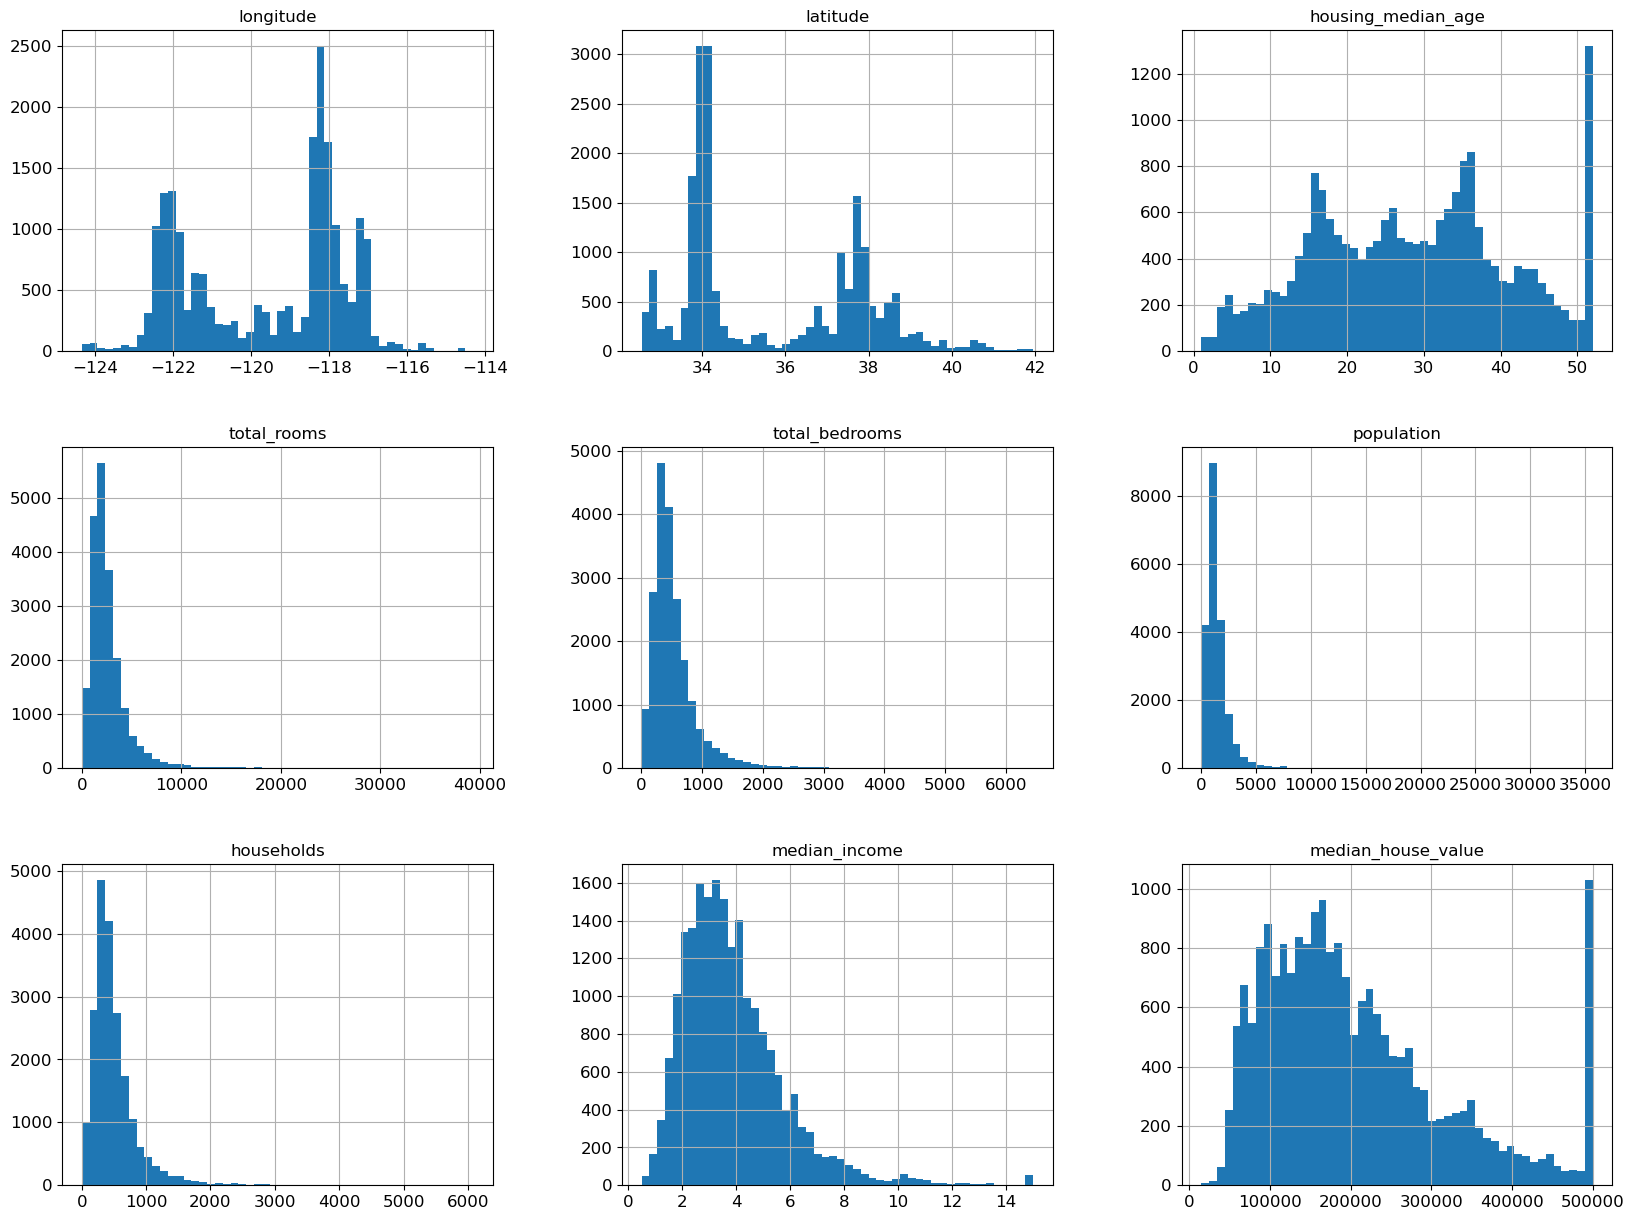

In [6]:
# a good way to see outliers and skew for our dataset
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# to make this notebook's output identical at every run
np.random.seed(42)

## More Exploration
Not strictly necessary, but we can plot the lat / long and it appears as the outline of California with many of our costly houses clustered along the coast.

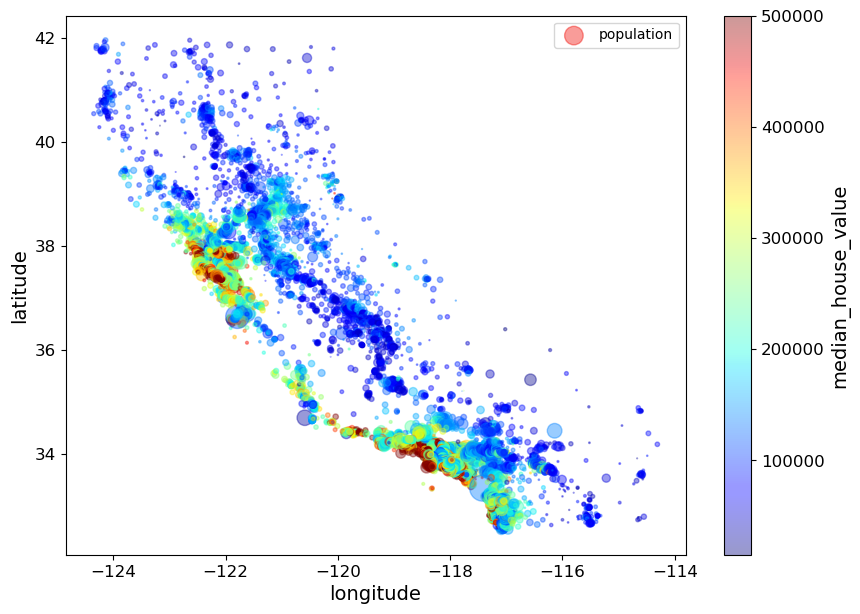

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [9]:
corr_matrix = housing.drop("ocean_proximity",axis=1).corr()

In [10]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

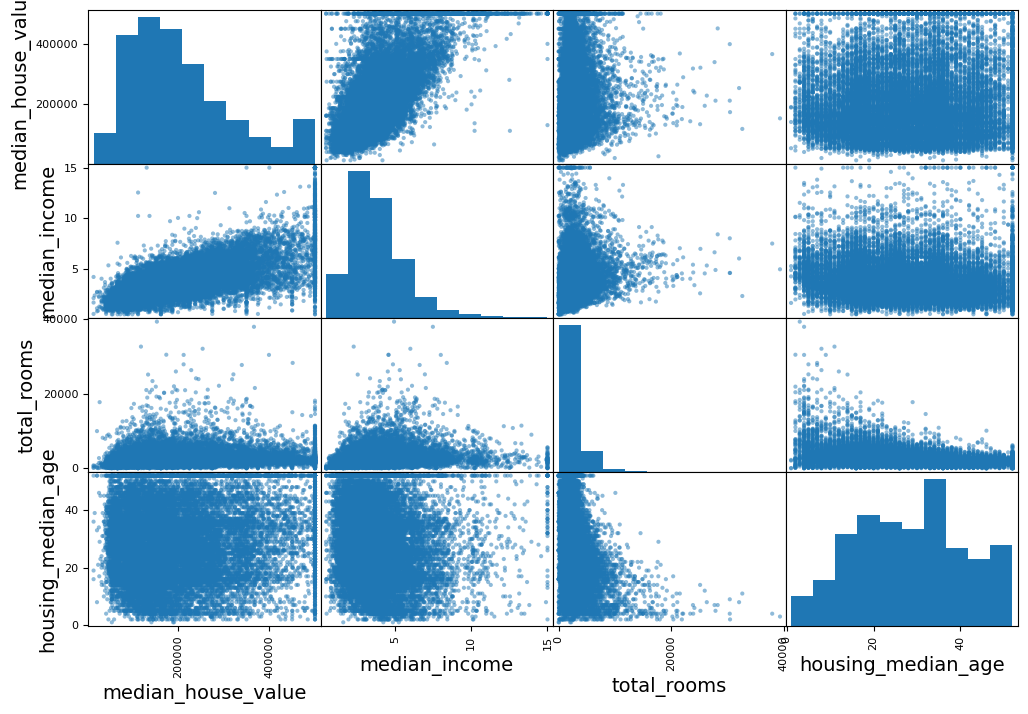

In [11]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

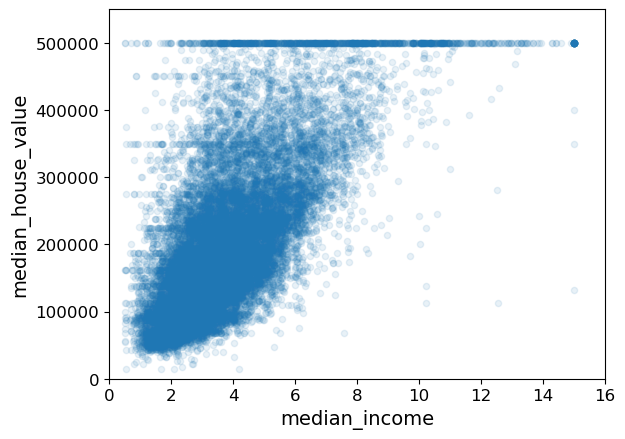

In [12]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

# Data pre-processing
## Encoding categoricals
Some algorithms can accomodate non-numeric fields, but many cannot.  We will encode the categorical data, ocean_proximity, so that it is numeric and we can use any algorithm.

In [13]:
#ordianl encoding gives each value a numeric value and converts them accordingly, in this case 'NEAR BAY' may map to 1 and 'INLAND' to 2
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing['proximity'] = ordinal_encoder.fit_transform(housing[['ocean_proximity']]).reshape(-1,1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.0


In [14]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [15]:
#now we don't need the string value, we've encoded it and can remove the string value
housing = housing.drop("ocean_proximity", axis=1)

## Missing Values
We have some missing values, some algorithms will fail when training or predicting on NULL values so we need to 

In [16]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
proximity               0
dtype: int64

In [17]:
#imputers can use different strategies, including median, mean, and unique value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [18]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [19]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  1.0000e+00])

In [20]:
#fill in missing values using the calculated statistics
X = imputer.transform(housing)

In [21]:
housing_tr = pd.DataFrame(X, columns=housing.columns, index=housing.index)

In [22]:
imputer.strategy

'median'

In [23]:
housing_tr = pd.DataFrame(X, columns=housing.columns,
                          index=housing.index)

In [24]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [25]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
proximity             0
dtype: int64

# Splitting Data
We don't want our model to overfit, we will split the data so the algorithm can learn from most of the data, while being evaluated or measured on data it hasn't seen to prevent it from memorizing the entire dataset and appearing more accurate than it is.
[Overfitting](https://www.mathworks.com/discovery/overfitting.html)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(housing_tr.drop("median_house_value",axis=1), housing_tr['median_house_value'], test_size=0.2, random_state=42)

In [27]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1.0
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0.0


# Fitting Models
SKLearn provides a consistent interface for creating models, once we've prepared the data, we can initialize and fit a model in two lines of code.

In [28]:
#a simple model to start with
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
#generate some predictions from our
lin_reg.predict(X_test[:5])

array([ 63642.87562831, 154445.82484211, 252777.76132136, 263796.8643552 ,
       266307.35634572])

In [30]:
y_test[:5]

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

71147.87146118355

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

68511.25428149624

In [34]:
from xgboost import XGBRegressor

bst = XGBRegressor(objective='reg:squarederror')
# fit model
bst.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
housing_predictions = bst.predict(X_test)
xgb_mse = mean_squared_error(y_test, housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse, ", ", xgb_mse)

48433.236277576776 ,  2345778376.319579


# Fine-Tune Your Model

## Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [50, 100, 200], 'max_depth': [4, 10, 20], 'learning_rate': [1, 2]},
  ]

xgreg = XGBRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(xgreg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid=[{'learning_rate': [1, 2], 'max_depth': [4, 10, 20],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [37]:
grid_search.best_params_

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 50}

In [38]:
best_xgr = grid_search.best_estimator_

In [39]:
housing_predictions = best_xgr.predict(X_test)
xgb_mse = mean_squared_error(y_test, housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse, ", ", xgb_mse)

53803.53968849252 ,  2894820883.01119
